# Khai báo thư viện

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------------------------
from sklearn import preprocessing
from sklearn.decomposition import PCA
# ------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# ------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
# ------------------------------------------------------------------
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import make_scorer, silhouette_samples

# Data

In [22]:
df = pd.read_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\Shopping Mall Customer Segmentation Data (Base)\data_preprocessed.csv")

In [23]:
print(f"{df.shape[0]} bản ghi")
print(f"{df.shape[1]} trường dữ liệu")

999 bản ghi
6 trường dữ liệu


In [24]:
df.head()

,Unnamed: 0,customer_id,age,annual_income,spending_score,gender_Female
0,0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,-1.145516,0.798813,1.337059,0.0
1,1,1770b26f-493f-46b6-837f-4237fb5a314e,0.180335,1.442076,1.545929,1.0
2,2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,0.369742,-0.743208,0.884507,1.0
3,3,9795712a-ad19-47bf-8886-4f997d6046e3,-1.476979,-1.038953,0.223086,0.0
4,4,64139426-2226-4cd6-bf09-91bce4b4db5e,-1.429627,0.842317,0.884507,0.0


In [25]:
data = df.drop(columns=["customer_id",],axis=1,)

In [26]:
X = data.copy()

In [27]:
X.head()

,Unnamed: 0,age,annual_income,spending_score,gender_Female
0,0,-1.145516,0.798813,1.337059,0.0
1,1,0.180335,1.442076,1.545929,1.0
2,2,0.369742,-0.743208,0.884507,1.0
3,3,-1.476979,-1.038953,0.223086,0.0
4,4,-1.429627,0.842317,0.884507,0.0


# Kmeans

In [28]:
range_n_clusters = list(range(2, 11))
inertias = []
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

## 1. Elbow chọn k tối ưu

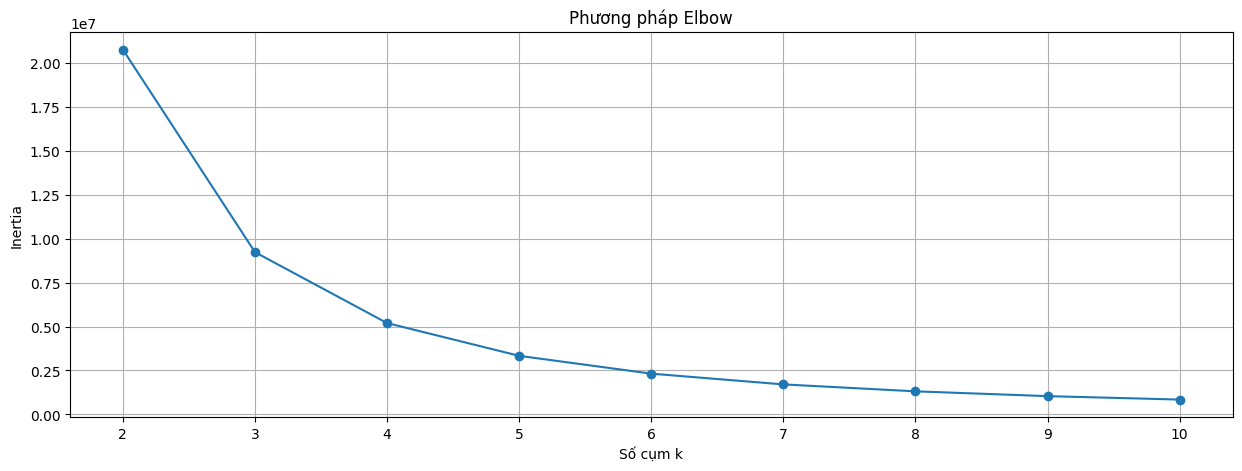

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(range_n_clusters, inertias, "o-")
plt.xlabel("Số cụm k")
plt.ylabel("Inertia")
plt.title("Phương pháp Elbow")
plt.grid(True)
plt.show()

## 2. Silhouette chọn k tối ưu

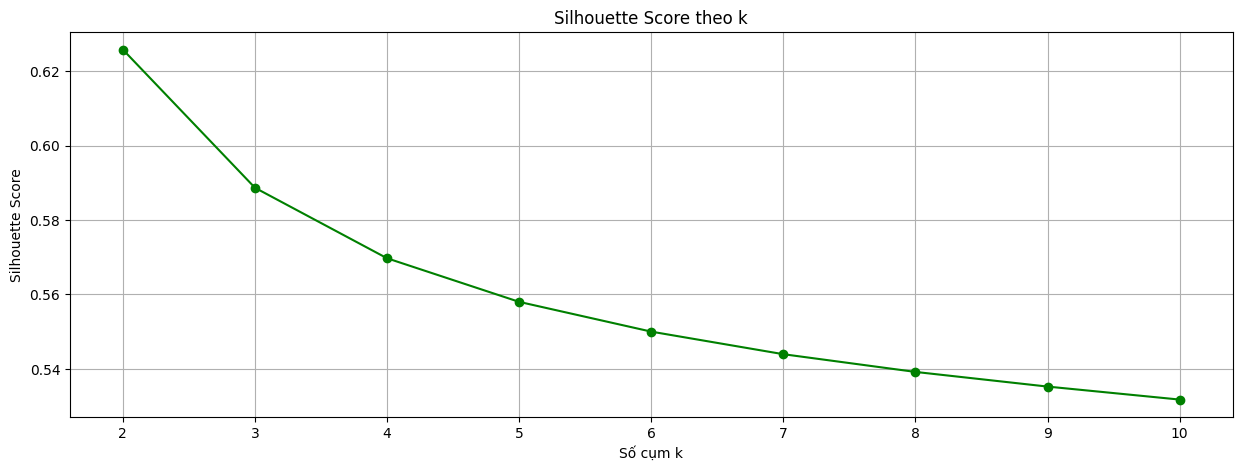

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(range_n_clusters, silhouette_scores, "o-", color="green")
plt.xlabel("Số cụm k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score theo k")
plt.grid(True)
plt.show()

## 3. KMeans

In [31]:
best_k = range_n_clusters[np.argmax(silhouette_scores)]
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans_best.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

In [32]:
print(f"\nKMeans tối ưu:")
print(f"- Số lượng cụm: {best_k}")
print(f"- Silhouette Score: {silhouette_kmeans:.3f}")
print(f"- Davies Bouldin Score: {davies_bouldin_score(X, kmeans_labels):.3f}")
print(f"- Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_labels):.3f}")


KMeans tối ưu:
- Số lượng cụm: 2
- Silhouette Score: 0.626
- Davies Bouldin Score: 0.500
- Calinski Harabasz Score: 2990.541


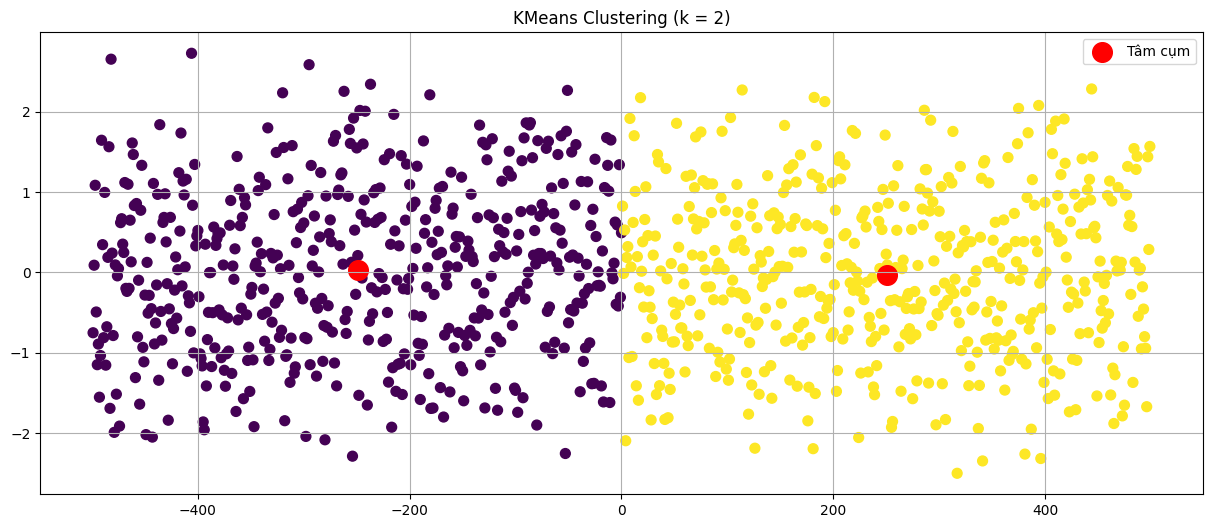

In [33]:
# Giảm số chiều về 2
X_2d = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(15, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap="viridis", s=50)

# Nếu kmeans_best.cluster_centers_ đang ở không gian gốc, thì cần PCA cho nó luôn
centers_2d = PCA(n_components=2).fit(X).transform(kmeans_best.cluster_centers_)

plt.scatter(
    centers_2d[:, 0],
    centers_2d[:, 1],
    c="red",
    s=200,
    marker="o",
    label="Tâm cụm",
)

plt.title(f"KMeans Clustering (k = {best_k})")
plt.legend()
plt.grid(True)
plt.show()

# Affinity Propagation

In [34]:
# Cấu hình default
ap = AffinityPropagation()
ap_labels = ap.fit_predict(X)

n_clusters_ap = len(np.unique(ap_labels))
silhouette_ap = silhouette_score(X, ap_labels)

In [35]:
print(f"Affinity Propagation:")
print(f"- Số lượng cụm: {n_clusters_ap}")
print(f"- Silhouette Score: {silhouette_ap:.3f}")
print(f"- Davies Bouldin Score: {davies_bouldin_score(X, ap_labels):.3f}")
print(f"- Calinski Harabasz Score: {calinski_harabasz_score(X, ap_labels):.3f}")

Affinity Propagation:
- Số lượng cụm: 565
- Silhouette Score: 0.120
- Davies Bouldin Score: 0.182
- Calinski Harabasz Score: 416.781


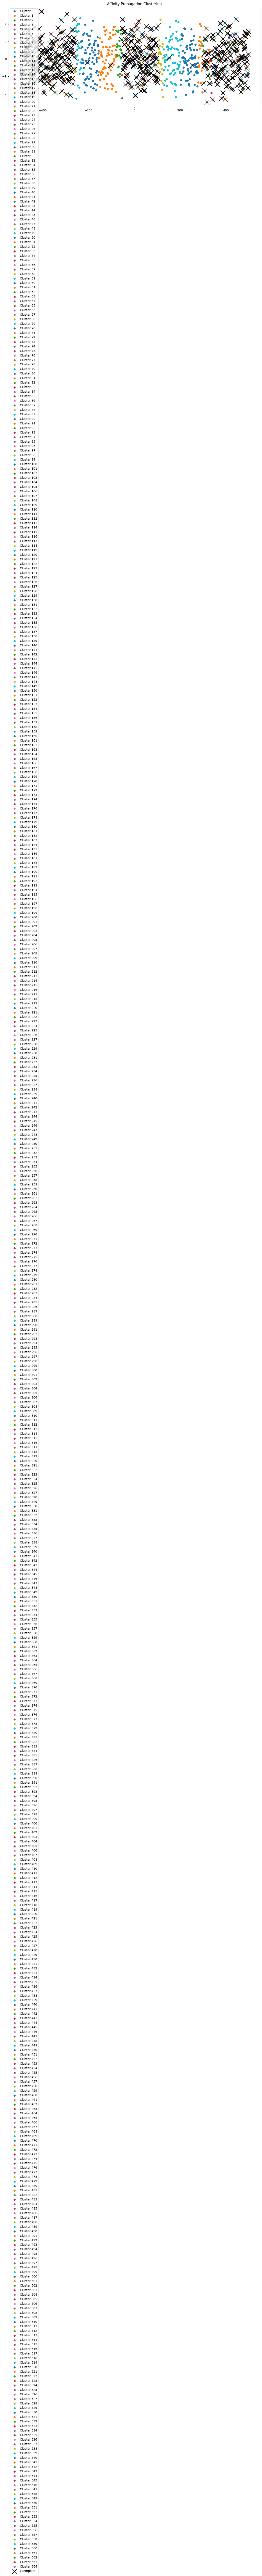

In [36]:
# Giảm số chiều về 2
X_2d = PCA(n_components=2).fit_transform(X)
labels = ap.labels_
exemplars = ap.cluster_centers_indices_

plt.figure(figsize=(15, 6))
for cluster in set(labels):
    plt.scatter(
        X_2d[labels == cluster, 0],
        X_2d[labels == cluster, 1],
        label=f"Cluster {cluster}",
    )

plt.scatter(
    X_2d[exemplars, 0],
    X_2d[exemplars, 1],
    c="black",
    marker="x",
    s=250,
    label="Exemplars",
    edgecolors="white",
)

plt.legend()
plt.title("Affinity Propagation Clustering")
plt.show()

# Tổng kết

In [37]:
print(f"Affinity Propagation:")
print(f"- Số lượng cụm: {n_clusters_ap}")
print(f"- Silhouette Score: {silhouette_ap:.3f}")
print(f"- Davies Bouldin Score: {davies_bouldin_score(X, ap_labels):.3f}")
print(f"- Calinski Harabasz Score: {calinski_harabasz_score(X, ap_labels):.3f}")

Affinity Propagation:
- Số lượng cụm: 565
- Silhouette Score: 0.120
- Davies Bouldin Score: 0.182
- Calinski Harabasz Score: 416.781


In [38]:
print(f"\nKMeans tối ưu:")
print(f"- Số lượng cụm: {best_k}")
print(f"- Silhouette Score: {silhouette_kmeans:.3f}")
print(f"- Davies Bouldin Score: {davies_bouldin_score(X, kmeans_labels):.3f}")
print(f"- Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_labels):.3f}")


KMeans tối ưu:
- Số lượng cụm: 2
- Silhouette Score: 0.626
- Davies Bouldin Score: 0.500
- Calinski Harabasz Score: 2990.541
